#### Import necessary libraries

In [1295]:
import pandas as pd
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch import nn
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#### Import files into dataframe

In [1296]:
file_path = "Housing.csv"

In [1297]:
df = pd.read_csv(file_path)

In [1298]:
df = df.sample(frac=1, random_state=42)

In [1299]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


In [1300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 316 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


In [1301]:
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','parking']
numerical_features = [['price','area', 'bedrooms', 'bathrooms', 'stories']]

In [1302]:
df.shape

(545, 13)

#### Feature Engineering

In [1303]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1304]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [1305]:
le = LabelEncoder()
for column in categorical_features:
    df[column] = le.fit_transform(df[column])

In [1306]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,2
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0


In [1307]:
for column in numerical_features:
    df[column] = np.log(df[column])

In [1308]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,15.216694,8.682708,1.386294,0.693147,0.693147,0,0,1,0,0,1,0,2
77,15.710127,8.779557,1.098612,0.693147,1.098612,1,0,0,0,1,0,1,0
360,15.126542,8.304000,0.693147,0.000000,0.000000,1,0,0,0,0,0,0,1
90,15.678039,8.517193,1.098612,0.000000,0.693147,1,0,0,0,1,0,0,1
493,14.845130,8.283999,1.098612,0.000000,0.000000,1,0,0,0,0,0,0,0


In [1309]:
scaler = StandardScaler()
for column in numerical_features:
    df[column] = scaler.fit_transform(df[column])

In [1310]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,-0.242839,0.543253,1.301942,1.538894,0.458448,0,0,1,0,0,1,0,2
77,1.084225,0.786645,0.169807,1.538894,1.354082,1,0,0,0,1,0,1,0
360,-0.485296,-0.408470,-1.425848,-0.588967,-1.072649,1,0,0,0,0,0,0,1
90,0.997925,0.127302,0.169807,-0.588967,0.458448,1,0,0,0,1,0,0,1
493,-1.242140,-0.458733,0.169807,-0.588967,-1.072649,1,0,0,0,0,0,0,0


<Axes: >

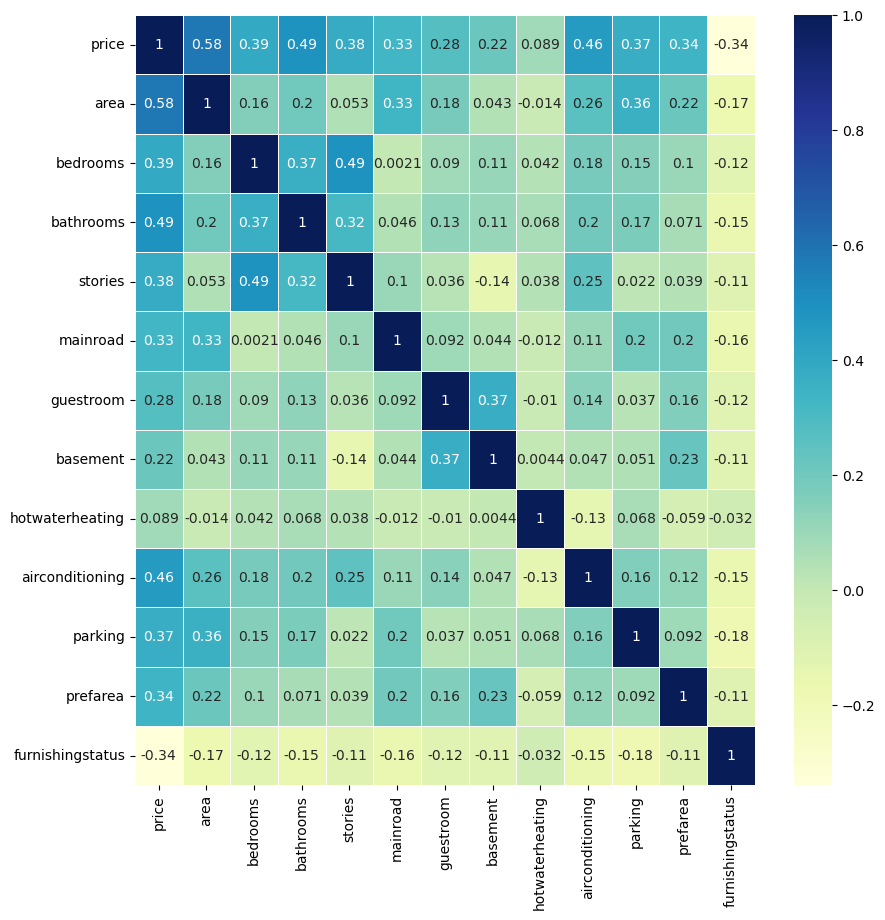

In [1311]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=.5, ax=ax, annot=True) 

In [1312]:
df = df.drop(['hotwaterheating'], axis=1)

In [1313]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
316,-0.242839,0.543253,1.301942,1.538894,0.458448,0,0,1,0,1,0,2
77,1.084225,0.786645,0.169807,1.538894,1.354082,1,0,0,1,0,1,0
360,-0.485296,-0.408470,-1.425848,-0.588967,-1.072649,1,0,0,0,0,0,1
90,0.997925,0.127302,0.169807,-0.588967,0.458448,1,0,0,1,0,0,1
493,-1.242140,-0.458733,0.169807,-0.588967,-1.072649,1,0,0,0,0,0,0


#### Train-test split

In [1314]:
# X = df_new.iloc[:,1:]
# X = torch.from_numpy(selected_df['area_log'].values.reshape(-1,1)).float()
X = torch.from_numpy(df.iloc[:,1:].values)
X

tensor([[ 0.5433,  1.3019,  1.5389,  ...,  1.0000,  0.0000,  2.0000],
        [ 0.7866,  0.1698,  1.5389,  ...,  0.0000,  1.0000,  0.0000],
        [-0.4085, -1.4258, -0.5890,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [-0.1375,  0.1698,  1.5389,  ...,  1.0000,  0.0000,  0.0000],
        [-0.4085, -1.4258, -0.5890,  ...,  0.0000,  0.0000,  2.0000],
        [ 0.3668,  0.1698,  1.5389,  ...,  1.0000,  0.0000,  1.0000]],
       dtype=torch.float64)

In [1315]:
# y = df_new.iloc[:,:1
# y = torch.from_numpy(selected_df['price_log'].values.reshape(-1,1)).float()
y = torch.from_numpy(df.iloc[:,:1].values)
y

tensor([[-2.4284e-01],
        [ 1.0842e+00],
        [-4.8530e-01],
        [ 9.9793e-01],
        [-1.2421e+00],
        [ 2.6292e-01],
        [ 4.4847e-01],
        [ 5.9467e-02],
        [-1.6013e+00],
        [-7.5740e-01],
        [ 2.2215e+00],
        [-1.3801e+00],
        [-7.5180e-01],
        [-7.5180e-01],
        [-1.8006e+00],
        [-1.3801e+00],
        [-1.3801e+00],
        [ 1.3534e+00],
        [-1.1109e+00],
        [-1.1757e+00],
        [ 1.1124e+00],
        [ 5.3666e-01],
        [-2.2992e+00],
        [ 4.4847e-01],
        [-1.5615e-01],
        [ 2.7272e+00],
        [-9.8581e-01],
        [ 3.7578e-01],
        [ 2.1271e+00],
        [-1.5255e+00],
        [ 1.1403e+00],
        [-6.4201e-01],
        [ 1.0842e+00],
        [-1.1109e+00],
        [-7.7996e-01],
        [-1.5166e-01],
        [ 2.6292e-01],
        [-8.0842e-01],
        [-6.4201e-01],
        [-1.6792e+00],
        [ 5.7114e-01],
        [-5.1079e-01],
        [ 1.0842e+00],
        [ 2

In [1316]:
X.shape, y.shape

(torch.Size([545, 11]), torch.Size([545, 1]))

In [1317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [1318]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([436, 11]),
 torch.Size([109, 11]),
 torch.Size([436, 1]),
 torch.Size([109, 1]))

In [1319]:
import math

def xavier_init(in_features, out_features):
    std = math.sqrt(1 / (in_features + out_features))
    return torch.empty((out_features, in_features)).normal_(0, std)


In [1320]:
import torch.optim as optim

alpha = 0.003
losses = []
torch.manual_seed(42)
weight = torch.randn(X_train.shape[1], 1, dtype=X_train.dtype, requires_grad=True)
bias = torch.zeros(1, 1, requires_grad=True)

for i in range(15000):
    Z = X_train @ weight + bias
    L = torch.abs(Z - y_train).mean()
    losses.append(L.item())
    
    # Compute gradients manually
    dL_dZ = torch.sign(Z - y_train) / y_train.shape[0]
    dL_dW = X_train.t() @ dL_dZ
    dL_dB = dL_dZ.sum(0, keepdim=True)
    
    # Update weights and biases
    with torch.no_grad():
        weight -= alpha * dL_dW
        bias -= alpha * dL_dB

# After the loop, losses will contain the history of losses during training


In [1321]:
y_train.shape

torch.Size([436, 1])

In [1322]:
X_train.shape, weight.shape, weight

(torch.Size([436, 11]),
 torch.Size([11, 1]),
 tensor([[ 0.3172],
         [ 0.0298],
         [ 0.2311],
         [ 0.1788],
         [ 0.1760],
         [ 0.1973],
         [ 0.2105],
         [ 0.3477],
         [ 0.0822],
         [ 0.3667],
         [-0.1553]], dtype=torch.float64, requires_grad=True))

In [1323]:
Z - y_train

tensor([[-9.7306e-02],
        [-8.2753e-01],
        [ 1.2603e+00],
        [-6.6612e-01],
        [ 3.9598e-01],
        [-9.1057e-01],
        [ 2.7493e-01],
        [ 1.3112e+00],
        [ 4.5203e-01],
        [-3.8200e-01],
        [-7.0118e-01],
        [ 1.6711e-01],
        [-3.2470e-01],
        [-1.1369e-01],
        [ 2.9052e-01],
        [-4.0152e-01],
        [ 6.6751e-02],
        [ 4.6009e-01],
        [ 3.0345e-01],
        [-1.1193e-01],
        [-4.4218e-02],
        [-4.3516e-01],
        [ 7.9598e-01],
        [ 8.0204e-01],
        [-1.4255e-01],
        [ 9.5078e-01],
        [-1.0563e-01],
        [ 2.3025e-01],
        [-9.5866e-01],
        [ 2.4995e-01],
        [-1.1171e-01],
        [ 1.3982e-01],
        [-2.6623e-01],
        [ 6.6327e-01],
        [-3.7913e-01],
        [ 4.9981e-01],
        [ 7.1987e-03],
        [ 6.9956e-01],
        [-2.0740e-01],
        [-7.1180e-01],
        [ 9.4514e-02],
        [ 9.1546e-02],
        [-7.5203e-01],
        [ 1

In [1324]:
weight.shape

torch.Size([11, 1])

In [1325]:
bias.shape

torch.Size([1, 1])

In [1326]:
X_train[0] @ weight + bias - y_train[0]

tensor([[-0.0972]], dtype=torch.float64, grad_fn=<SubBackward0>)

In [1327]:
X_train.shape, weight.shape, bias.shape

(torch.Size([436, 11]), torch.Size([11, 1]), torch.Size([1, 1]))

In [1328]:
Z.shape

torch.Size([436, 1])

In [1329]:
X_train[0], weight[0], bias[0], y_train[0]

(tensor([0.5855, 0.1698, 1.5389, 1.9895, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 1.0000], dtype=torch.float64),
 tensor([0.3172], dtype=torch.float64, grad_fn=<SelectBackward0>),
 tensor([-0.3120], grad_fn=<SelectBackward0>),
 tensor([1.0558], dtype=torch.float64))

In [1330]:
losses

[1.1575603394307072,
 1.1558455858685073,
 1.1541308323063073,
 1.1524160787577247,
 1.1507013251819074,
 1.14898657160609,
 1.1472718180847419,
 1.1455570645089248,
 1.1438423109331075,
 1.1421275573572898,
 1.1404243820037694,
 1.1387443318202561,
 1.1370642815299399,
 1.1353842313464269,
 1.1337084889608788,
 1.1320767469446305,
 1.1304572358231655,
 1.128856121214293,
 1.127267598744946,
 1.125695689885784,
 1.1241441429774812,
 1.1226418558214937,
 1.121164709311174,
 1.1196875628008542,
 1.118210416478508,
 1.1167332699681887,
 1.115269486278067,
 1.1138821164836097,
 1.1125271852045089,
 1.1111977952192171,
 1.109879725082702,
 1.108582371604359,
 1.107285018126016,
 1.1059924493396334,
 1.1047205554905422,
 1.1034559827882506,
 1.102191410085959,
 1.1009268373836671,
 1.0996686235661055,
 1.0984373149277007,
 1.0972060062892968,
 1.0959746976508922,
 1.0947433890124878,
 1.0935202903600594,
 1.092327131259497,
 1.0911339721589348,
 1.089945172387051,
 1.088791108908832,
 1.0876

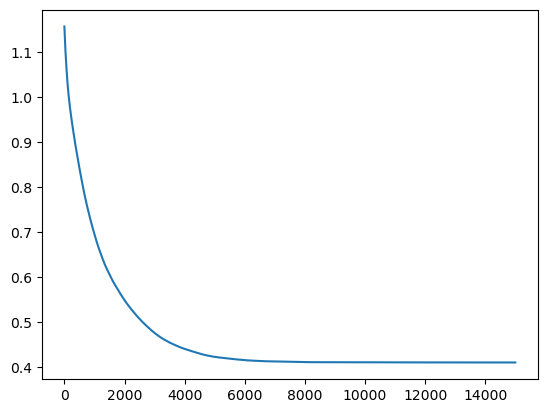

In [1331]:
plt.plot(losses)

In [1332]:
weight, bias

(tensor([[ 0.3172],
         [ 0.0298],
         [ 0.2311],
         [ 0.1788],
         [ 0.1760],
         [ 0.1973],
         [ 0.2105],
         [ 0.3477],
         [ 0.0822],
         [ 0.3667],
         [-0.1553]], dtype=torch.float64, requires_grad=True),
 tensor([[-0.3120]], requires_grad=True))

In [1333]:
weight.detach().numpy() * 0.396564 + bias.detach().numpy()

array([[-0.18627395],
       [-0.30022758],
       [-0.22039342],
       [-0.24113431],
       [-0.24225207],
       [-0.2338185 ],
       [-0.22856592],
       [-0.17414433],
       [-0.27945821],
       [-0.16663172],
       [-0.37363134]])

In [1334]:
# X_test @ weight.detach() + bias.detach()

In [1335]:
result = X_test@ weight.detach() + bias.detach()


In [1336]:
from torchmetrics import R2Score

r2score = R2Score()
r2 = r2score(X_test @ weight.detach() + bias.detach(), y_test)
print("R^2 Score:", r2.item())


R^2 Score: 0.6542841196060181


In [1337]:
y_test[:5], result

(tensor([[-0.3857],
         [ 0.2242],
         [-1.0476],
         [-0.0635],
         [-1.7191]], dtype=torch.float64),
 tensor([[ 0.4883],
         [ 0.0630],
         [-1.0736],
         [-0.9747],
         [-1.0297],
         [ 0.3644],
         [-0.6475],
         [ 0.1290],
         [ 1.4685],
         [ 0.1092],
         [ 0.5183],
         [-0.6367],
         [-0.7251],
         [-0.0801],
         [-0.1761],
         [-0.1833],
         [ 0.2608],
         [-1.0259],
         [-0.3328],
         [-0.6603],
         [ 0.0296],
         [ 0.1052],
         [ 1.1162],
         [ 1.3097],
         [-0.2322],
         [-0.7913],
         [-0.5681],
         [ 0.5772],
         [ 2.0960],
         [-0.4709],
         [-0.0104],
         [-0.2520],
         [-0.1443],
         [ 0.1224],
         [-0.4872],
         [-1.1332],
         [ 0.5012],
         [ 0.2078],
         [ 0.2524],
         [-0.6411],
         [ 1.0289],
         [ 0.6112],
         [-0.3909],
         [ 1.8754

In [1338]:
X_test[1]

tensor([ 0.0326, -1.4258, -0.5890, -1.0726,  1.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  1.0000,  1.0000], dtype=torch.float64)

In [1339]:
normalized_value = 0.1997

In [1340]:
torch.exp(torch.tensor([[0.1997]], dtype=torch.float64))

tensor([[1.2210]], dtype=torch.float64)

In [1341]:
4.056535e+06

4056535.0

In [1342]:
y_test[1]

tensor([0.2242], dtype=torch.float64)